### Example analysis

In [8]:
# This allows us to manually edit the code and have it reflected in this notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# import everything we need

import json # to prettyprint ordereddict

import numpy as np
import pandas as pd # using pd.__version__ == 0.24.2, There are newer versions and things might break!!!

print('pd.__version__:', pd.__version__)

import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display, clear_output
import ipywidgets

from samiPostAnalysis import samiPostAnalysis

pd.__version__: 1.0.3


### Create a samiPostAnalysis object with all of our sekelton analysis across groups (wtf, wtm, kof, kom)

This assumes eveything has been processed with samiAnalysis.py

In particular

```
wtfPath = '../analysis/wt-female_results.csv'
kofPath = '../analysis/ko-female_results.csv'
wtmPath = '../analysis/wt-male_results.csv'
komPath = '../analysis/ko-male_results.csv'
```


In [10]:
spa = samiPostAnalysis()

samiPostAnalysis() is loading analysis files
    loading: ../analysis/wt-female_results.csv
    loading: ../analysis/ko-female_results.csv
    loading: ../analysis/wt-male_results.csv
    loading: ../analysis/ko-male_results.csv


### Throughout this analysis we will be using a 'pruneDict' to specify the data to pull from the raw analysis.

Fetch a default pruneDict with

```
pruneDict = spa.getDefaultPruneDict()
```

'genotype': in ('wt', 'ko')
'sex': in ('male', 'female')
'branchType' : specifies branch type as xxx

In [11]:
pruneDict = spa.getDefaultPruneDict()
print(json.dumps(pruneDict, indent=4))


{
    "genotype": [],
    "sex": [],
    "branchType": [
        2
    ],
    "useRemove": true,
    "statName": "len3d",
    "minValue": 1,
    "doCellMean": false,
    "statTest": "Mann-Whitney"
}


### Here is a snapshot of the df we are working with (from samiAnalysis)

In [12]:

display(spa.df.head())
display(spa.df.tail())

,Unnamed: 0,myCellNumber,filename,genotype,sex,xVoxel,yVoxel,zVoxel,branchType,len3d,euclideanDist,tortuosity,path,image_coord_src_0,image_coord_src_1,image_coord_src_2,image_coord_dst_0,image_coord_dst_1,image_coord_dst_2
0,0.0,0.0,1_5ADVMLEG1L1_ch2.tif,wt,female,0.209253,0.209253,0.43,1.0,2.575107,2.467170,1.043749,../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...,0.00,136.000000,364.000000,5.647059,136.764706,365.941176
1,1.0,0.0,1_5ADVMLEG1L1_ch2.tif,wt,female,0.209253,0.209253,0.43,1.0,0.690499,0.690499,1.000000,../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...,2.00,118.666667,232.666667,2.000000,121.000000,235.000000
2,2.0,0.0,1_5ADVMLEG1L1_ch2.tif,wt,female,0.209253,0.209253,0.43,1.0,1.994908,1.245800,1.601306,../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...,2.00,118.666667,232.666667,3.000000,117.000000,238.000000
3,3.0,0.0,1_5ADVMLEG1L1_ch2.tif,wt,female,0.209253,0.209253,0.43,2.0,1.556086,1.401366,1.110406,../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...,2.00,118.666667,232.666667,4.250000,115.000000,229.500000
4,4.0,0.0,1_5ADVMLEG1L1_ch2.tif,wt,female,0.209253,0.209253,0.43,2.0,1.178658,0.678506,1.737138,../data/200108/WT_Female/Cell_1/1_5ADVMLEG1L1_...,4.25,115.000000,229.500000,4.000000,113.000000,227.000000


,Unnamed: 0,myCellNumber,filename,genotype,sex,xVoxel,yVoxel,zVoxel,branchType,len3d,euclideanDist,tortuosity,path,image_coord_src_0,image_coord_src_1,image_coord_src_2,image_coord_dst_0,image_coord_dst_1,image_coord_dst_2
134195,50115.0,43.0,KO Male 9_3ADVMLEG1L1_ch2.tif,ko,male,0.089874,0.089874,0.43,0.0,0.829696,0.560480,1.480330,../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...,27.0,243.0,271.0,28.0,247.0,271.0
134196,50116.0,43.0,KO Male 9_3ADVMLEG1L1_ch2.tif,ko,male,0.089874,0.089874,0.43,0.0,0.665367,0.538429,1.235756,../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...,27.0,272.0,411.0,28.0,274.0,408.0
134197,50117.0,43.0,KO Male 9_3ADVMLEG1L1_ch2.tif,ko,male,0.089874,0.089874,0.43,0.0,0.887683,0.200965,4.417104,../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...,28.0,321.0,480.0,28.0,323.0,481.0
134198,50118.0,43.0,KO Male 9_3ADVMLEG1L1_ch2.tif,ko,male,0.089874,0.089874,0.43,0.0,1.067432,0.370561,2.880582,../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...,29.0,314.0,471.0,29.0,315.0,475.0
134199,50119.0,43.0,KO Male 9_3ADVMLEG1L1_ch2.tif,ko,male,0.089874,0.089874,0.43,0.0,0.216976,0.200965,1.079669,../data/200421/BIN1smKO Male/Cell 9/KO Male 9_...,30.0,287.0,418.0,30.0,288.0,420.0


### Per cell mean of 'female' len3d

In [13]:
# set up a pruneDict to specify what we want
pruneDict = spa.getDefaultPruneDict()
pruneDict['sex'] = ['female']
pruneDict['statName'] = 'len3d'

# get the per cell mean
dfCellMean = spa.getCellMean(pruneDict, verbose=False)

# display results
display(dfCellMean)

,genotype,sex,myCellNumber,mean,std,sem,count
0,ko,female,0.0,2.078456,1.124697,0.055077,417
1,ko,female,1.0,2.196565,1.183670,0.048363,599
2,ko,female,2.0,2.028299,1.108399,0.042196,690
3,ko,female,3.0,2.303606,1.216898,0.053623,515
4,ko,female,4.0,2.289841,1.434204,0.068686,436
5,ko,female,5.0,2.020372,1.027996,0.068840,223
6,ko,female,7.0,2.049654,0.937333,0.068545,187
7,ko,female,8.0,1.983250,1.003027,0.052645,363
8,ko,female,9.0,2.474729,1.826881,0.095233,368
9,ko,female,10.0,1.964213,1.047308,0.051164,419


### Plot all raw data.

Problem here is each cell has different number of branches and we are not weighing the contribution of each cell...

'\nplt.close(2)\nplt.close(3)\nplt.close(4)\nplt.close(5)\n'

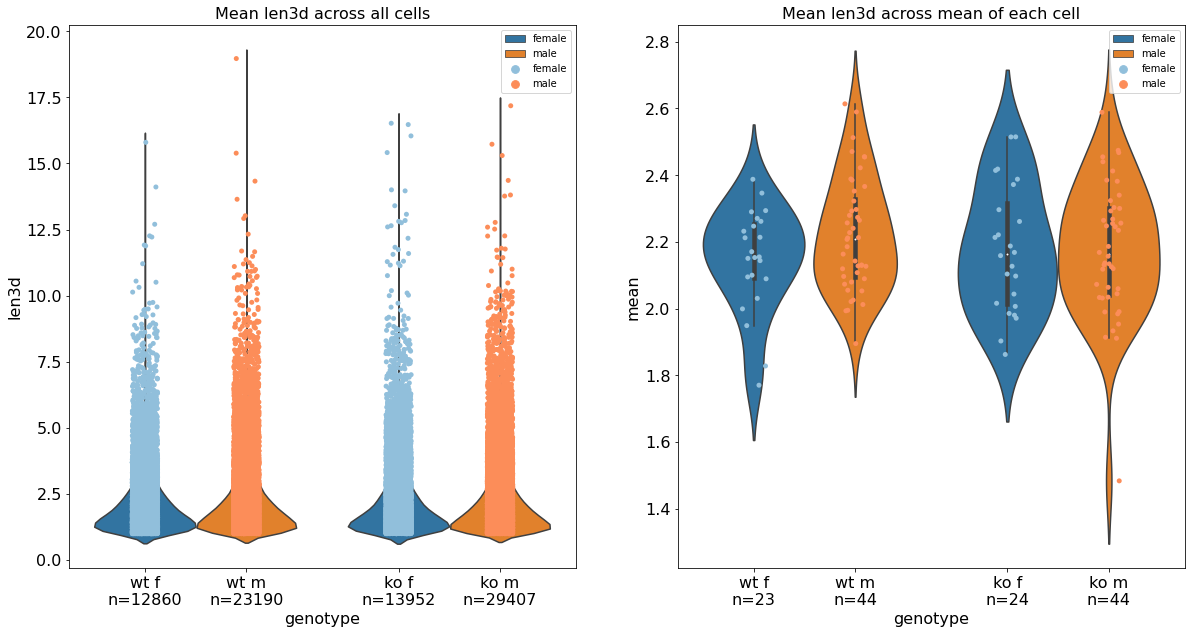

In [15]:
#fig, axs = plt.subplots(1, 2, sharey=True, figsize=(20,10))
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(20,10))
axs = np.ravel(axs) # flatten into 1D

pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d' # 'tortuosity'
pruneDict['minValue'] = 1 # only inlude branch length >= 2
pruneDict['branchType'] = [1,2] # brancType==2 are branches connected on both ends

# branch length across all cells (does not weight cells with low number or high number of branches)
ax = axs[0]
g1 = spa.plotCondMean(pruneDict, doCellMean=False, ax=ax)

# this can't be done in plotCondMean() ???
#spa.plotCondMeanLegend(ax)
'''
xAxisLabels = ['wt f\nn=xxx', 'wt m\nn=xxx', 'ko f\nn=xxx', 'ko m\nn=xxx']
ax.set_xticks([-0.2,0.2, 0.8,1.2])
ax.set_xticklabels(xAxisLabels)
'''

# branch length per cell
ax = axs[1]
g2 = spa.plotCondMean(pruneDict, doCellMean=True, ax=axs[1])
# show the plots
#plt.show()

# this is a bug in seaborn, we were getting spurious empy figure ax
# see:
#     https://github.com/mwaskom/seaborn/issues/1583
#     https://github.com/mwaskom/seaborn/issues/1514
'''
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
'''

### Histograms to compare groups, e.g. wtf vs wtm

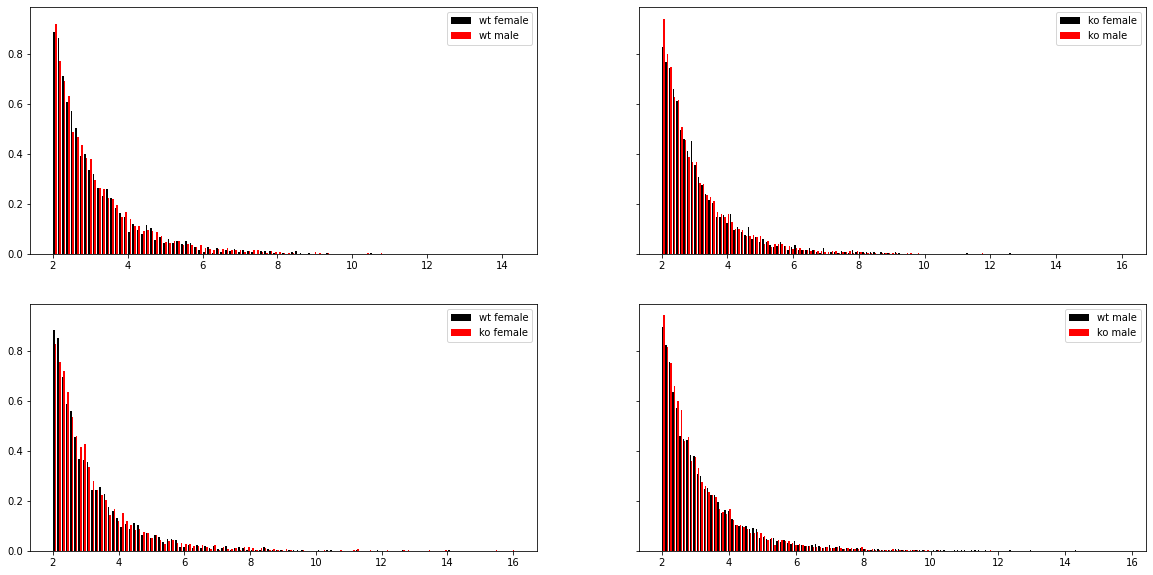

In [16]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(20,10))
axs = np.ravel(axs) # flatten

pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d' # 'tortuosity'
pruneDict['minValue'] = 2 # only inlude branch length >= 2
pruneDict['branchType'] = [2] # brancType==2 are branches connected on both ends

# 0
ax = axs[0]
pruneDict['genotype'] = ['wt']
pruneDict['sex'] = ['female', 'male']
spa.plotHist(pruneDict=pruneDict, ax=ax)

# 1
ax = axs[1]
pruneDict['genotype'] = ['ko']
pruneDict['sex'] = ['female', 'male']
spa.plotHist(pruneDict=pruneDict, ax=ax)

# 2
ax = axs[2]
pruneDict['genotype'] = ['wt', 'ko']
pruneDict['sex'] = ['female']
spa.plotHist(pruneDict=pruneDict, ax=ax)

# 3
ax = axs[3]
pruneDict['genotype'] = ['wt', 'ko']
pruneDict['sex'] = ['male']
spa.plotHist(pruneDict=pruneDict, ax=ax)


# Stats

### Table of cell means

In [17]:
pruneDict = spa.getDefaultPruneDict()
#pruneDict['genotype'] = ['wt']
#pruneDict['sex'] = ['male']
pruneDict['branchType'] = 2
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1

cellMean = spa.getCellMean(pruneDict)

display(cellMean.head())
display(cellMean.tail())


,genotype,sex,myCellNumber,mean,std,sem,count
0,ko,female,0.0,2.078456,1.124697,0.055077,417
1,ko,female,1.0,2.196565,1.183670,0.048363,599
2,ko,female,2.0,2.028299,1.108399,0.042196,690
3,ko,female,3.0,2.303606,1.216898,0.053623,515
4,ko,female,4.0,2.289841,1.434204,0.068686,436


,genotype,sex,myCellNumber,mean,std,sem,count
130,wt,male,39.0,2.382916,1.224777,0.057355,456
131,wt,male,40.0,1.954545,1.103072,0.053133,431
132,wt,male,41.0,2.218287,1.231473,0.085387,208
133,wt,male,42.0,2.267757,1.238605,0.059387,435
134,wt,male,43.0,2.016126,1.127221,0.058209,375


### Pairwise stas for each cell

This is breaking the rules with repeated statistical tests. This is only used for quality control to make sure cell within a condition (like wt-female) do not **ALL** come up statistically different.

In [18]:
# getPairwiseCellComparison() requires one [genotype] and one [sex]

pruneDict = spa.getDefaultPruneDict()
pruneDict['genotype'] = ['wt']
pruneDict['sex'] = ['male']
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 2
pruneDict['branchType'] = [2]

# p-value matrix
prob = spa.getPairwiseCellComparison(pruneDict)

display(prob)

,cells,0,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,40,41,42,43
0,0,0.99123,0.275829,0.354557,0.361308,0.668541,0.445111,0.141505,0.621981,0.5715,...,0.784425,0.846972,0.989249,0.290125,0.384903,0.807388,0.866137,0.997315,0.632786,0.282731
1,1,,0.964619,0.0368884,0.369364,0.141801,0.532249,0.741685,0.202853,0.177825,...,0.162153,0.0876202,0.124816,0.356858,0.352586,0.110494,0.0544787,0.11288,0.199578,0.341804
2,2,,,0.983426,0.0292961,0.747106,0.0652041,0.0064905,0.0773832,0.0442475,...,0.116521,0.0952038,0.172314,0.0155116,0.027589,0.0886293,0.236203,0.200215,0.0495224,0.012486
3,3,,,,0.994641,0.244245,0.980755,0.519881,0.300824,0.329728,...,0.175658,0.13562,0.143208,0.809965,0.777644,0.180506,0.0382261,0.0993324,0.377401,0.853695
4,4,,,,,0.979498,0.242311,0.107903,0.404946,0.36149,...,0.490919,0.591701,0.601136,0.209133,0.226589,0.560612,0.81241,0.698012,0.441868,0.202178
5,5,,,,,,0.992255,0.626212,0.524526,0.526832,...,0.315959,0.276782,0.230257,0.914832,0.79317,0.313099,0.138481,0.232498,0.459867,0.962140
6,6,,,,,,,0.997906,0.0635403,0.0370191,...,0.0139982,0.00698976,0.00762705,0.214675,0.186166,0.00935508,0.00106642,0.00858256,0.0341553,0.302407
7,7,,,,,,,,0.999131,0.822075,...,0.461443,0.536646,0.333708,0.226614,0.393476,0.597832,0.142025,0.321185,0.931919,0.255837
8,8,,,,,,,,,0.999701,...,0.285757,0.317196,0.166608,0.141616,0.333573,0.379784,0.0360685,0.156841,0.98698,0.236060
9,9,,,,,,,,,,...,0.939675,0.92487,0.676366,0.0333337,0.0887494,0.991071,0.273936,0.544874,0.496454,0.072786


## Group means

### This is the most important part, we can compare significant difference between groups while varying the analysis parameters.

```
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
```

### Here we can calculate group means (e.g. wtf, wtm, kof, kom) across all measurements or by taking the main of mean within cells using doCellMean=True.

In [19]:
pruneDict = spa.getDefaultPruneDict()
pruneDict['statName'] = 'len3d'
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
pruneDict['statTest'] = 'Mann-Whitney' # one of ('T-Test', 'Mann-Whitney', 'Kruskal-Wallis')

# this pools all measurements across all cells (does not use mean within a cell)
print('Lumping all measurements across cells. Cell with more measurements contribute more !!!')
df1, df2 = spa.getPairwiseGroupComparison(pruneDict, doCellMean=False)

display(df1)
display(df2)

# this pools across the mean within each cell. 
print('Stats based on the "mean" from each cell')
df1, df2 = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)

display(df1)
display(df2)


Lumping all measurements across cells. Cell with more measurements contribute more !!!


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.999999,0.0529173,2.9534e-05,0.076729
1,"(wt, male)",,1,3.08025e-11,0.000006
2,"(ko, female)",,,0.999999,0.001641
3,"(ko, male)",,,,1.000000


,name,mean,std,sem,n,f,p
0,"(wt, female)",2.137532,1.166737,0.012378,8886,,
1,"(wt, female)",2.137532,1.166737,0.012378,8886,3.94805e+07,0.999999
2,"(wt, female)",2.137532,1.166737,0.012378,8886,,
3,"(wt, male)",2.178792,1.223599,0.009705,15897,6.95849e+07,0.0529173
4,"(wt, female)",2.137532,1.166737,0.012378,8886,,
5,"(ko, female)",2.100824,1.210416,0.012531,9331,4.29396e+07,2.9534e-05
6,"(wt, female)",2.137532,1.166737,0.012378,8886,,
7,"(ko, male)",2.120198,1.168227,0.008170,20446,9.20211e+07,0.0767287
8,"(wt, male)",2.178792,1.223599,0.009705,15897,,
9,"(wt, male)",2.178792,1.223599,0.009705,15897,1.26357e+08,1


Stats based on the "mean" from each cell


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.99123,0.379864,0.773883,0.994732
1,"(wt, male)",,0.99667,0.197143,0.247752
2,"(ko, female)",,,0.991769,0.802396
3,"(ko, male)",,,,0.996670


,name,mean,std,sem,n,f,p
0,"(wt, female)",2.122809,0.173068,0.036898,23,,
1,"(wt, female)",2.122809,0.173068,0.036898,23,264.5,0.99123
2,"(wt, female)",2.122809,0.173068,0.036898,23,,
3,"(wt, male)",2.177746,0.188016,0.028672,44,439,0.379864
4,"(wt, female)",2.122809,0.173068,0.036898,23,,
5,"(ko, female)",2.116266,0.181963,0.037942,24,290,0.773883
6,"(wt, female)",2.122809,0.173068,0.036898,23,,
7,"(ko, male)",2.128658,0.187975,0.028666,44,506,0.994732
8,"(wt, male)",2.177746,0.188016,0.028672,44,,
9,"(wt, male)",2.177746,0.188016,0.028672,44,968,0.99667


### Compare different analysis parameters

In [20]:

# just use cell mean. If we don't, cells get weighted different based on number of branches

pruneDict = spa.getDefaultPruneDict()
pruneDict['statTest'] = 'Mann-Whitney' # one of ('T-Test', 'Mann-Whitney', 'Kruskal-Wallis')
pruneDict['statName'] = 'len3d'

wtf_vs_wtm = [] # collect p-values for each run

print('branchType=[2]')
pruneDict['minValue'] = 1
pruneDict['branchType'] = [2]
df1a, df2a = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)
df1n = spa.getCounts(pruneDict, asDict=False)
display(df1a)
display(df1n)

# b
print('branchType=[]')
pruneDict['minValue'] = 1
pruneDict['branchType'] = []
df1b, df2b = spa.getPairwiseGroupComparison(pruneDict, doCellMean=True)
df1n = spa.getCounts(pruneDict, asDict=False)
display(df1b)
display(df1n)


branchType=[2]


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.99123,0.379864,0.773883,0.994732
1,"(wt, male)",,0.99667,0.197143,0.247752
2,"(ko, female)",,,0.991769,0.802396
3,"(ko, male)",,,,0.996670


,genotype,sex,nRaw,nCell
0,wt,female,8886,23
1,wt,male,15897,44
2,ko,female,9331,24
3,ko,male,20446,44


branchType=[]


,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.99123,0.432037,0.923706,0.889723
1,"(wt, male)",,0.99667,0.437509,0.415835
2,"(ko, female)",,,0.991769,0.913137
3,"(ko, male)",,,,0.996670


,genotype,sex,nRaw,nCell
0,wt,female,13811,23
1,wt,male,25263,44
2,ko,female,15263,24
3,ko,male,31771,44


In [13]:
# move this up
from ipywidgets import Layout, Button, Box

branchTypeList = [[], [0], [1], [2], [3], [1,2]]

global df1a, df2a, df1n, df2n

pruneDict1 = spa.getDefaultPruneDict()
pruneDict1['branchType'] = []
pruneDict1['minValue'] = 0
df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
df1n = spa.getCounts(pruneDict1, asDict=False)
#
pruneDict2 = spa.getDefaultPruneDict()
pruneDict2['branchType'] = []
pruneDict2['minValue'] = 0
df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
df2n = spa.getCounts(pruneDict2, asDict=False)

# not sure why this behavior, variable declared global can be used inside function def()
#global branchType_Dropdown1, minValue_FloatSlider1

# put controls in an H Box layout
myHBoxLayout1 = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid 1px',
                    width='50%')

#
# 1
branchTypeName1 = 'Branch Type 1'
style = {'description_width': 'initial'}
branchType_Dropdown1 = ipywidgets.Dropdown(
    options=branchTypeList,
    value=[],
    style=style,
    description=branchTypeName1,
)

minValue1 = 'Min Value 1'
minValue_FloatSlider1 = ipywidgets.FloatSlider(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description=minValue1,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

items = [branchType_Dropdown1, minValue_FloatSlider1]
hBox1 = Box(children=items, layout=myHBoxLayout1)
#display(hBox1)

#
# 2
branchTypeName2 = 'Branch Type 2'
style = {'description_width': 'initial'}
branchType_Dropdown2 = ipywidgets.Dropdown(
    options=branchTypeList,
    value=[],
    style=style,
    description=branchTypeName2,
)

minValueName2 = 'Min Value 2'
minValue_FloatSlider2 = ipywidgets.FloatSlider(
    value=0,
    min=0,
    max=10.0,
    step=0.1,
    description=minValueName2,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

items = [branchType_Dropdown2, minValue_FloatSlider2]
hBox2 = Box(children=items, layout=myHBoxLayout1)
#display(hBox1)

def myDisplay():
    display(df1a)
    display(df1n)
    display(hBox1)
    #display(branchType_Dropdown1)
    #display(minValue_FloatSlider1)
    #
    display(df2a)
    display(df2n)
    display(hBox2)
    #display(branchType_Dropdown2)
    #display(minValue_FloatSlider2)
    
def on_change(change):
    global df1a, df2a, df1n, df2n
    if change['type'] == 'change' and change['name'] == 'value':
        #print('change:', change)
        #print('=== change["owner"].description:', change["owner"].description)
        #print('changed to:', change['new'], type(change['new']))
        newValue = change['new'] # can be (str, float)
        description = change["owner"].description
        #print('description:', description)
        
        # 1
        if description == branchTypeName1:
            pruneDict1['branchType'] = newValue
            df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
            df1n = spa.getCounts(pruneDict1, asDict=False)
            #
            clear_output(wait=True)
            myDisplay()
        elif description == minValue1:
            pruneDict1['minValue'] = newValue
            df1a, df1b = spa.getPairwiseGroupComparison(pruneDict1, doCellMean=True)
            df1n = spa.getCounts(pruneDict1, asDict=False)
            #
            clear_output(wait=True)
            myDisplay()

        # 2
        elif description == branchTypeName2:
            pruneDict2['branchType'] = newValue
            df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
            df2n = spa.getCounts(pruneDict2, asDict=False)
           #
            clear_output(wait=True)
            myDisplay()
        elif description == minValueName2:
            pruneDict2['minValue'] = newValue
            df2a, df2b = spa.getPairwiseGroupComparison(pruneDict2, doCellMean=True)
            df2n = spa.getCounts(pruneDict2, asDict=False)
           #
            clear_output(wait=True)
            myDisplay()

# 1
branchType_Dropdown1.observe(on_change)
minValue_FloatSlider1.observe(on_change)
# 2
branchType_Dropdown2.observe(on_change)
minValue_FloatSlider2.observe(on_change)

myDisplay()



,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.99123,0.232058,0.693798,0.583680
1,"(wt, male)",,0.99667,0.352161,0.251183
2,"(ko, female)",,,0.991769,0.862457
3,"(ko, male)",,,,0.996670


,genotype,sex,nRaw,nCell
0,wt,female,9952,23
1,wt,male,18093,44
2,ko,female,10643,24
3,ko,male,22611,44


Box(children=(Dropdown(description='Branch Type 1', index=5, options=([], [0], [1], [2], [3], [1, 2]), style=D…

,groups,"(wt, female)","(wt, male)","(ko, female)","(ko, male)"
0,"(wt, female)",0.99123,0.817244,0.237556,0.401732
1,"(wt, male)",,0.99667,0.240301,0.420633
2,"(ko, female)",,,0.991769,0.594327
3,"(ko, male)",,,,0.996670


,genotype,sex,nRaw,nCell
0,wt,female,20245,23
1,wt,male,37486,44
2,ko,female,24056,24
3,ko,male,48735,44


Box(children=(Dropdown(description='Branch Type 2', options=([], [0], [1], [2], [3], [1, 2]), style=Descriptio…